In [1]:
#### Librerías y modulos ####
import pandas as pd
import numpy as np
import seaborn as sns
import os,json
import matplotlib.pyplot as plt
import sklearn
from pandas.io import gbq
import warnings
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor
import sys
from datetime import date, datetime, timedelta
sys.path.insert(0, os.path.join(os.path.dirname(os.getcwd()),'src/'))
from funcs_cotizador import *
from funcs_gral import *

In [2]:
#### Configuraciones de la notebook ####
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
#pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
warnings.filterwarnings("ignore")

In [3]:
# Paths
path_datos = '../datos/'
path_reports = '../reports/'

In [4]:
#!pip install pandas-gbq

In [5]:
# Importar tabla de Big Query
filter_date = '2022-01-01'
query = '''
            select *
            from `data-team-k.pricing_data.dolar_values` 
            where date >= '{}'
            and source = 'Blue'
            order by date
            
            '''.format(filter_date)
df_dolar_values = gbq.read_gbq(query, project_id="data-team-k")

Cuando llegue el momento de mergear esta tabla con nuestro dataset para traernos el dolar del dolar blue (el momento sera post filtro de duplicados). El merge sera en base a la col **date** del dataset

# Load data

In [6]:
# Importar tabla de Big Query
#query = '''
#SELECT car_id, runtime, date, price_symbol, price_amount, car_year,car_kms, year
#,dealer, match_marca_a, score_marca_a, match_modelo_a,score_modelo_a, match_v1_a
#, score_v1_a, total_score_a, Seg_a,Subseg_a, match_marca_c, score_marca_c,
#match_modelo_c, score_modelo_c, match_v1_c, score_v1_c,total_score_c
#, Seg_c, Subseg_c
#FROM `data-team-k.pricing_data.match_meli_ok`
#WHERE date between '2022-03-20' and '2022-03-31'
#            '''.format(filter_date)
#df_meli_mar_1 = gbq.read_gbq(query, project_id="data-team-k")

In [7]:
#df_meli_mar_1.shape

In [8]:
#df_meli_mar_1.date.min()

In [9]:
#df_meli_mar_1.date.max()

In [10]:
# checkpoint download
#df_meli_mar_1.to_pickle('{}df_meli_mar_1.pkl'.format(path_datos))

In [11]:
# Importar tabla de Big Query
#query = '''
#SELECT car_id, runtime, date, price_symbol, price_amount, car_year,car_kms, year
#,dealer, match_marca_a, score_marca_a, match_modelo_a,score_modelo_a, match_v1_a
#, score_v1_a, total_score_a, Seg_a,Subseg_a, match_marca_c, score_marca_c,
#match_modelo_c, score_modelo_c, match_v1_c, score_v1_c,total_score_c
#, Seg_c, Subseg_c
#FROM `data-team-k.pricing_data.match_meli_ok`
#WHERE date between '2022-03-01' and '2022-03-19'
#            '''.format(filter_date)
#df_meli_mar_2 = gbq.read_gbq(query, project_id="data-team-k")

In [12]:
#df_meli_mar_2.shape

In [13]:
#df_meli_mar_2.date.min()

In [14]:
#df_meli_mar_2.date.max()

In [15]:
# checkpoint download
#df_meli_mar_2.to_pickle('{}df_meli_mar_2.pkl'.format(path_datos))

In [16]:
# Importar tabla de Big Query
#query = '''SELECT *
#           FROM `data-team-k.pricing_data.match_meli_ok`
#           WHERE date between '2022-04-01' and '2022-04-14'
#            '''.format(filter_date)
#df_meli1 = gbq.read_gbq(query, project_id="data-team-k")

In [17]:
#df_meli1.shape

In [18]:
#df_meli1.date.min()

In [19]:
#df_meli1.date.max()

In [20]:
#df_meli1 = df_meli1[['car_id','runtime', 'date', 'price_symbol', 'price_amount', 'car_year','car_kms', 'year','dealer'
#, 'match_marca_a', 'score_marca_a', 'match_modelo_a','score_modelo_a', 'match_v1_a'
#, 'score_v1_a', 'total_score_a', 'Seg_a','Subseg_a', 'match_marca_c', 'score_marca_c',
#'match_modelo_c', 'score_modelo_c', 'match_v1_c', 'score_v1_c','total_score_c'
#, 'Seg_c', 'Subseg_c']].copy()

In [21]:
# checkpoint download
#df_meli1.to_pickle('{}df_meli1.pkl'.format(path_datos))

In [22]:
# Importar tabla de Big Query
#query = '''SELECT *
#           FROM `data-team-k.pricing_data.match_meli_ok`
#           WHERE date >= '2022-04-15'
#            '''.format(filter_date)
#df_meli2 = gbq.read_gbq(query, project_id="data-team-k")

In [23]:
#df_meli2.columns

In [24]:
#df_meli2.shape

In [25]:
#df_meli2.date.max()

In [26]:
#df_meli2.date.min()

In [27]:
#df_meli2 = df_meli2[['car_id','runtime', 'date', 'price_symbol', 'price_amount', 'car_year','car_kms', 'year','dealer'
#, 'match_marca_a', 'score_marca_a', 'match_modelo_a','score_modelo_a', 'match_v1_a'
#, 'score_v1_a', 'total_score_a', 'Seg_a','Subseg_a', 'match_marca_c', 'score_marca_c',
#'match_modelo_c', 'score_modelo_c', 'match_v1_c', 'score_v1_c','total_score_c'
#, 'Seg_c', 'Subseg_c']].copy()

In [28]:
# checkpoint download
#df_meli2.to_pickle('{}df_meli2.pkl'.format(path_datos))

In [29]:
# checkpoint upload
df = pd.read_pickle('{}df_meli2.pkl'.format(path_datos))

In [30]:
#display(
#df_meli_mar_1.shape, df_meli_mar_2.shape, df_meli1.shape, df_meli2.shape)

In [31]:
# Apendeamos los dos df
#df = pd.concat([df_meli_mar_1, df_meli_mar_2,df_meli1,df_meli2],ignore_index=True)

In [32]:
df.shape

(3872110, 27)

In [33]:
df = df[['car_id','runtime', 'date', 'price_symbol', 'price_amount', 'car_year','car_kms', 'year','dealer'
, 'match_marca_a', 'score_marca_a', 'match_modelo_a','score_modelo_a', 'match_v1_a'
, 'score_v1_a', 'total_score_a', 'Seg_a','Subseg_a', 'match_marca_c', 'score_marca_c',
'match_modelo_c', 'score_modelo_c', 'match_v1_c', 'score_v1_c','total_score_c'
, 'Seg_c', 'Subseg_c']].copy()

In [34]:
df.shape

(3872110, 27)

In [35]:
df['date'] = pd.to_datetime(df['date'])

In [36]:
#df.groupby('date').size()

In [37]:
display(df.date.max(), df.date.min())

Timestamp('2022-05-24 00:00:00')

Timestamp('2022-04-15 00:00:00')

In [38]:
df.columns

Index(['car_id', 'runtime', 'date', 'price_symbol', 'price_amount', 'car_year',
       'car_kms', 'year', 'dealer', 'match_marca_a', 'score_marca_a',
       'match_modelo_a', 'score_modelo_a', 'match_v1_a', 'score_v1_a',
       'total_score_a', 'Seg_a', 'Subseg_a', 'match_marca_c', 'score_marca_c',
       'match_modelo_c', 'score_modelo_c', 'match_v1_c', 'score_v1_c',
       'total_score_c', 'Seg_c', 'Subseg_c'],
      dtype='object')

In [39]:
#df.dtypes

# Cleaning/Preprocessing *(before split)*

### *Eliminar nulos*

In [40]:
subset = ['car_year','car_kms','match_marca_a','match_modelo_a','match_v1_a','Subseg_a', 'Seg_a']
df = null_clean(df=df, subset=subset)

Every row with null values in the columns present in the subset will be removed
Hey! 727 were removed due to null values


### *Eliminar duplicados*

In [41]:
# Tratamiento de la feautre "runtime"
old_shape = df.shape[0]
df['runtime'] = pd.to_datetime(df.runtime.apply(lambda x: str(x)[:19]))
df = df.sort_values(['runtime'])
# Ahora si, teniendo el df ordenado, eliminamos los duplicados, quedandonos con el registro más reciente (la última ocurrencia)
df.drop_duplicates(subset=['car_id'], keep='last', inplace=True)
print(f'Hey! {old_shape - df.shape[0]} were removed due to duplicate values')

Hey! 3684484 were removed due to duplicate values


In [42]:
df.shape

(186899, 27)

### *Eliminar 11111 & 999999*

**Dropeamos valores como 111111 o 999999 (ya sean outliers o no)**<br> 
* Pueden existir casos donde estos valores extraños no sean outliers, por lo tanto no los vamos a conseguir limpiar cuando dropiemos outliers. Es por eso que desarrollamos el siguiente metodo
* Es clave hacerlo en este momento sobre "price_amount" y no sobre "price_meli_ok" ya que hay casos en los que el price simbol es USD y luego cuando lo multiplicamos por el TC para pasar a "price_meli_ok" dejan de cumplir estas condiciones de ser 111111 o 999999 y les perdemos el rastro

In [43]:
df['price_amount'] = df.price_amount.astype('int')

In [44]:
m1 = df.price_amount == 1111
m2 = df.price_amount == 11111
m3 = df.price_amount == 111111
m4 = df.price_amount == 1111111
m5 = df.price_amount == 11111111
m6 = df.price_amount == 111111111

len(df[m1 | m2 | m3 | m4 | m5 | m6])

78

In [45]:
# observamos
df[m1 | m2 | m3 | m4 | m5 | m6][['price_amount']].head()

,price_amount
1368081,11111111
205308,1111111
3251007,111111
154658,11111111
3346602,1111111


In [46]:
df.shape

(186899, 27)

In [47]:
# dropeamos
df = df[~(m1 | m2 | m3 | m4 | m5 | m6)]

In [48]:
df.shape

(186821, 27)

*Ahora lo mismo pero para los casos 999999*

In [49]:
m1 = df.price_amount == 9999
m2 = df.price_amount == 99999
m3 = df.price_amount == 999999
m4 = df.price_amount == 9999999
m5 = df.price_amount == 99999999

len(df[m1 | m2 | m3 | m4 | m5])

107

In [50]:
# observamos
df[m1 | m2 | m3 | m4 | m5 | m6][['price_amount']].head()

,price_amount
736655,999999
2918326,9999999
342016,9999
1314632,999999
3188324,99999999


In [51]:
df.shape

(186821, 27)

In [52]:
# dropeamos
df = df[~(m1 | m2 | m3 | m4 | m5)]

In [53]:
df.shape

(186714, 27)

*Ahora lo mismo para kms*

In [54]:
df['car_kms'] = df.car_kms.astype('int')

In [55]:
df[df.car_kms > 0]['car_kms'].min()

1

In [56]:
m1 = df.car_kms == 1
m2 = df.car_kms == 11
m3 = df.car_kms == 111
m4 = df.car_kms == 1111
m5 = df.car_kms == 11111
m6 = df.car_kms == 111111
m7 = df.car_kms == 1111111
m8 = df.car_kms == 11111111

len(df[ m1 | m2 | m3 | m4 | m5 | m6 | m7 | m8])

1066

In [57]:
# observamos
df[m1 | m2 | m3 | m4 | m5 | m6 | m7 | m8][['car_kms']].head()

,car_kms
392825,111111
2675285,1111111
2675281,111111
1327042,1111
550985,11111


In [58]:
df.shape

(186714, 27)

In [59]:
# dropeamos
df = df[~(m1 | m2 | m3 | m4 | m5 | m6 | m7 | m8)]

In [60]:
df.shape

(185648, 27)

*Lo mismo pero para los valores 99999*

In [61]:
m1 = df.car_kms == 999
m2 = df.car_kms == 9999
m3 = df.car_kms == 99999
m4 = df.car_kms == 999999
m5 = df.car_kms == 9999999

len(df[m1 | m2 | m3 | m4 | m5])

103

In [62]:
# observamos
df[m1 | m2 | m3 | m4 | m5][['car_kms']].head()

,car_kms
1888757,99999
1114164,999
2665774,999
731436,999999
1505048,999999


In [63]:
df.shape

(185648, 27)

In [64]:
# dropeamos
df = df[~(m1 | m2 | m3 | m4 | m5)]

In [65]:
df.shape

(185545, 27)

In [66]:
# checkpoint download
df.to_csv('{}df_checkpoint_1.pkl'.format(path_datos))

In [67]:
# checkpoint upload
#df = pd.read_csv('{}df_checkpoint_1.pkl'.format(path_save))
#df.shape

### *Dropeamos 0kms y concesionaria*

In [68]:
mask_not_0km = df.car_kms > 90
mask_not_conces = df.dealer == False

df = df[(mask_not_0km) & (mask_not_conces)]

In [69]:
df.shape

(88321, 27)

### *Dropeamos match_score por debajo de 80%*

In [70]:
lst = ['score_marca_a','score_modelo_a','score_v1_c']
for col in lst:
    df = df[df[col]>=80]
    
# chequeo
df[lst].min()

score_marca_a     92
score_modelo_a    86
score_v1_c        80
dtype: int64

In [71]:
df.shape

(59335, 27)

### *Dropeamos registros que no sean de los ultimos 60 / 90 / 10 días*

In [72]:
# DEFINIMOS LA VENTANA
ventana = 5

In [73]:
df.runtime.max()

Timestamp('2022-05-24 23:01:15')

In [74]:
from datetime import date, datetime, timedelta

In [75]:
df['runtime'] = df['runtime'].apply(pd.to_datetime)

In [76]:
df[['runtime']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59335 entries, 3278774 to 3243998
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   runtime  59335 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 927.1 KB


In [77]:
max_date = df.runtime.max()
mask_last15d = (df.runtime <= max_date) & ((df.runtime >= max_date - timedelta(days=ventana)))
df = df[mask_last15d]

In [78]:
df.runtime.max()

Timestamp('2022-05-24 23:01:15')

In [79]:
print(df.runtime.min())
print(df.runtime.max())

2022-05-20 00:00:25
2022-05-24 23:01:15


In [80]:
df.shape

(32224, 27)

### *Dropeamos categorías que no nos sirven*

*Las categorías que dejamos afuera, son las que no nos interesa cotizar porque irán a reglas o al equipo de pricing*

Los grupos de los escenarios los vamos a re-definir aca. Debido a que cuando lo hicimos en la nb "Tres escenarios" como un primer apporach estaba bien y aparte el objetivo era validar la hipotesis de outliers vs presencia. Pero ocurre que aca el procesamiento es más profundo, y por lo tanto un auto que capas estaba en el grupo 4 en la nb "Tres Escenarios" aca debido a las limpiezas extra respesto a esa nb, pierden muchisimo volumen y quedaría en grupos muchísimos más bajos que no entrarían para el algoritmo. El caso perfecto es la F-150 de FORD: en ese caso en la nb "Tres Esce" quedaba en el grupo 4, y aca desp de todo el procesamiento nos queda 1 solo caso el cual se nos fue a test despues de split y en train no estaba, por lo tanto tira error la funcion de data_processing_1().

**El procesamiento para armar los grupos es en base al nivel de agregacion marca-modelo-version!!**

In [81]:
df_grouped = df.groupby(['match_marca_a','match_modelo_a','match_v1_a'],as_index=False).size()
df_grouped.columns = ['marca','modelo','version','cant']
df_grouped.sort_values(by='cant',ascending=False,inplace=True)

In [82]:
df_grouped.head()

,marca,modelo,version,cant
1632,VOLKSWAGEN,Gol Trend,1.6 MSI 5Ptas. Trendline (101cv) (L17),386
1140,PEUGEOT,308,Allure 1.6 HDI NAV (115cv) 5Ptas. (L16),341
1488,TOYOTA,Etios,1.5 XLS AT (105cv) (L18) 4Ptas.,338
1622,VOLKSWAGEN,Gol Trend,1.6 3Ptas. Trendline / Pack I (101cv),276
1469,TOYOTA,Corolla,XEI 1.8 CVT (140cv) (L18),267


In [83]:
# Caso ejemplo
mask = df_grouped['marca'] == 'VOLKSWAGEN'
df_grouped[mask].sort_values(by='modelo')

,marca,modelo,version,cant
1541,VOLKSWAGEN,Amarok,2.0 TDI (140cv) 4x2 C/Simple Trendline (L17),9
1539,VOLKSWAGEN,Amarok,2.0 TDI (122cv) 4x4 C/Doble Startline,9
1556,VOLKSWAGEN,Amarok,2.0 TDI (180cv) 4x2 C/Doble Ultimate AT,9
1565,VOLKSWAGEN,Amarok,2.0 TDI (180cv) 4x4 C/Doble Ultimate AT,11
1538,VOLKSWAGEN,Amarok,2.0 TDI (122cv) 4x2 C/Doble Startline,15
1563,VOLKSWAGEN,Amarok,2.0 TDI (180cv) 4x4 C/Doble Trendline AT,67
1548,VOLKSWAGEN,Amarok,2.0 TDI (163cv) 4x4 C/Doble Startline,15
1558,VOLKSWAGEN,Amarok,2.0 TDI (180cv) 4x4 C/Doble Dark Label AT,15
1551,VOLKSWAGEN,Amarok,2.0 TDI (180cv) 4x2 C/Doble Dark Label AT,15
1560,VOLKSWAGEN,Amarok,2.0 TDI (180cv) 4x4 C/Doble Highline AT (L17),15


In [84]:
# agrupacion
df_grouped = df.groupby(['match_marca_a','match_modelo_a','match_v1_a'],as_index=False).size()
df_grouped.columns = ['marca','modelo','version','cant']
df_grouped.sort_values(by='cant',ascending=False,inplace=True)

# deciles
df_output = df_grouped.copy()

data = df_grouped.copy()
data.sort_values(by='cant',ascending=False,inplace=True)

data['cuantiles' + str('_'+'cant')] =pd.qcut(data['cant'], 10, duplicates='drop')

placeholder= 'marca'
tmp = data.groupby('cuantiles' + str('_'+'cant')).agg({placeholder:'count'}).rename(columns={placeholder:'placeholder'})
leni = len(tmp)
tmp['cuantil' + str('_'+'cant')] = list(reversed(list(np.arange(1,leni+1,1))))
tmp['bin' + str('_'+'cant')] = tmp.index
tmp.reset_index(drop=True,inplace=True)
tmp.drop('placeholder',1,inplace=True)

data = data.merge(tmp, how='inner',left_on=['cuantiles' + str('_'+'cant')], right_on='bin' + str('_'+'cant'))

#data.drop(cols_to_drop,1,inplace=True)

#df_output = df_output.merge(data, on=['marca','modelo','version'])

# seleccion y orden final de las columnas del output
#df_output_ok = df_output[['marca','modelo','version','cant','cuantil_cant','bin_cant']]
#df_output_ok.sort_values(by='cant',ascending=False,inplace=True)
#df_output_ok.head()

In [85]:
data.drop('cuantiles_cant',1,inplace=True)

In [86]:
data.version.nunique()

1722

In [87]:
asd = (data.groupby('cuantil_cant')['cant'].sum()/sum(data.cant))*100
asd

cuantil_cant
1   54.29
2   18.33
3   10.32
4    5.44
5    3.84
6    2.69
7    2.77
8    2.32
Name: cant, dtype: float64

In [88]:
tmp

,cuantil_cant,bin_cant
0,8,"(0.999, 2.0]"
1,7,"(2.0, 4.0]"
2,6,"(4.0, 6.0]"
3,5,"(6.0, 9.0]"
4,4,"(9.0, 13.0]"
5,3,"(13.0, 23.0]"
6,2,"(23.0, 47.0]"
7,1,"(47.0, 386.0]"


In [89]:
# Escenario de cotizacion: Algoritmo
print(f'Algoritmo: {asd.iloc[0:4].sum()}')
print(f'Reglas: {asd.iloc[4:7].sum()}')
print(f'Equipo Pricing: {asd.iloc[7:].sum()}')

Algoritmo: 88.38133068520357
Reglas: 9.303624627606753
Equipo Pricing: 2.315044687189672


In [90]:
# Marcas-modelos en cada grupo
data['marca_modelo_version'] = data['marca'] + str(' - ') +data['modelo'] + str(' - ') + data['version']
data.head()

,marca,modelo,version,cant,cuantil_cant,bin_cant,marca_modelo_version
0,VOLKSWAGEN,Gol Trend,1.6 MSI 5Ptas. Trendline (101cv) (L17),386,1,"(47.0, 386.0]",VOLKSWAGEN - Gol Trend - 1.6 MSI 5Ptas. Trendl...
1,PEUGEOT,308,Allure 1.6 HDI NAV (115cv) 5Ptas. (L16),341,1,"(47.0, 386.0]",PEUGEOT - 308 - Allure 1.6 HDI NAV (115cv) 5Pt...
2,TOYOTA,Etios,1.5 XLS AT (105cv) (L18) 4Ptas.,338,1,"(47.0, 386.0]",TOYOTA - Etios - 1.5 XLS AT (105cv) (L18) 4Ptas.
3,VOLKSWAGEN,Gol Trend,1.6 3Ptas. Trendline / Pack I (101cv),276,1,"(47.0, 386.0]",VOLKSWAGEN - Gol Trend - 1.6 3Ptas. Trendline ...
4,TOYOTA,Corolla,XEI 1.8 CVT (140cv) (L18),267,1,"(47.0, 386.0]",TOYOTA - Corolla - XEI 1.8 CVT (140cv) (L18)


In [91]:
# Caso ejemplo
data[data.modelo == 'Tiggo']

,marca,modelo,version,cant,cuantil_cant,bin_cant,marca_modelo_version
473,CHERY,Tiggo,2.0 16v 4x4 Luxury (138cv),16,3,"(13.0, 23.0]",CHERY - Tiggo - 2.0 16v 4x4 Luxury (138cv)
1230,CHERY,Tiggo,2.0 16v 4x2 Luxury AT (138cv),3,7,"(2.0, 4.0]",CHERY - Tiggo - 2.0 16v 4x2 Luxury AT (138cv)


In [92]:
len(data) == data.marca_modelo_version.nunique()

True

In [93]:
# Marcas-modelo-versiones en cada grupo
sorted(list(data[data['cuantil_cant']==1]['marca_modelo_version'].unique()))

['AUDI - A1 - 1.4 TFSi S-Tronic Ambition (122cv)',
 'CHEVROLET - Agile - 1.4 LS / LS Spirit 5Ptas.',
 'CHEVROLET - Agile - 1.4 LT / LT Spirit 5Ptas.',
 'CHEVROLET - Astra II - GL 2.0 8v',
 'CHEVROLET - Astra II - GLS 2.0 16v',
 'CHEVROLET - Aveo - LT 1.6 AT 4Ptas. (103cv)',
 'CHEVROLET - Celta - 1.4 N 8v LS AA DA (92cv) 3Ptas. (L13)',
 'CHEVROLET - Classic - 4Ptas. 1.4 N LS ABS ABC',
 'CHEVROLET - Classic - 4Ptas. 1.4 N LT Spirit Pack',
 'CHEVROLET - Classic - 4Ptas. 1.4 N Spirit / LS AA DA',
 'CHEVROLET - Corsa II - GSI 2.4 16v 5Ptas.',
 'CHEVROLET - Cruze - 1.8 LT MT (141cv) 4Ptas. ',
 'CHEVROLET - Cruze - 1.8 LTZ AT (141cv) 4Ptas. ',
 'CHEVROLET - Cruze - 1.8 LTZ MT (141cv) 4Ptas. ',
 'CHEVROLET - Meriva - 1.8 N 8v GL Plus',
 'CHEVROLET - Onix - 1.4 8v Joy LS MT (Plan) (98cv)',
 'CHEVROLET - Onix - 1.4 8v LT MT (98cv)',
 'CHEVROLET - Onix - 1.4 8v LTZ MT (98cv)',
 'CHEVROLET - Prisma - 1.4 8v LT MT (98cv)',
 'CHEVROLET - Prisma - 1.4 Joy LS+ MT (98cv) (Plan)',
 'CHEVROLET - Spin - 1

In [94]:
grupos_df = data.copy()
# nos quedamos únicamente con los grupos que entran al modelo
grupos_df_algor = grupos_df[grupos_df['cuantil_cant'].apply(lambda x: x in [1,2,3])] # == 1
# check
grupos_df_algor.cuantil_cant.unique()

array([1, 2, 3])

In [95]:
grupos_df_algor.rename(columns={'cuantil_cant':'grupos'},inplace=True)

In [96]:
grupos_df_algor.head()

,marca,modelo,version,cant,grupos,bin_cant,marca_modelo_version
0,VOLKSWAGEN,Gol Trend,1.6 MSI 5Ptas. Trendline (101cv) (L17),386,1,"(47.0, 386.0]",VOLKSWAGEN - Gol Trend - 1.6 MSI 5Ptas. Trendl...
1,PEUGEOT,308,Allure 1.6 HDI NAV (115cv) 5Ptas. (L16),341,1,"(47.0, 386.0]",PEUGEOT - 308 - Allure 1.6 HDI NAV (115cv) 5Pt...
2,TOYOTA,Etios,1.5 XLS AT (105cv) (L18) 4Ptas.,338,1,"(47.0, 386.0]",TOYOTA - Etios - 1.5 XLS AT (105cv) (L18) 4Ptas.
3,VOLKSWAGEN,Gol Trend,1.6 3Ptas. Trendline / Pack I (101cv),276,1,"(47.0, 386.0]",VOLKSWAGEN - Gol Trend - 1.6 3Ptas. Trendline ...
4,TOYOTA,Corolla,XEI 1.8 CVT (140cv) (L18),267,1,"(47.0, 386.0]",TOYOTA - Corolla - XEI 1.8 CVT (140cv) (L18)


In [97]:
df_grupos = grupos_df_algor[['marca','modelo','version','marca_modelo_version', 'grupos']]

In [98]:
df_grupos

,marca,modelo,version,marca_modelo_version,grupos
0,VOLKSWAGEN,Gol Trend,1.6 MSI 5Ptas. Trendline (101cv) (L17),VOLKSWAGEN - Gol Trend - 1.6 MSI 5Ptas. Trendl...,1
1,PEUGEOT,308,Allure 1.6 HDI NAV (115cv) 5Ptas. (L16),PEUGEOT - 308 - Allure 1.6 HDI NAV (115cv) 5Pt...,1
2,TOYOTA,Etios,1.5 XLS AT (105cv) (L18) 4Ptas.,TOYOTA - Etios - 1.5 XLS AT (105cv) (L18) 4Ptas.,1
3,VOLKSWAGEN,Gol Trend,1.6 3Ptas. Trendline / Pack I (101cv),VOLKSWAGEN - Gol Trend - 1.6 3Ptas. Trendline ...,1
4,TOYOTA,Corolla,XEI 1.8 CVT (140cv) (L18),TOYOTA - Corolla - XEI 1.8 CVT (140cv) (L18),1
...,...,...,...,...,...
534,TOYOTA,Rav 4,2.0 4x2 VX AT CVT Full (146cv) (L13),TOYOTA - Rav 4 - 2.0 4x2 VX AT CVT Full (146cv...,3
535,VOLKSWAGEN,Sharan,1.8 T Trendline,VOLKSWAGEN - Sharan - 1.8 T Trendline,3
536,CITROEN,C3 Picasso,1.6 VTi 115 Tendance (L13),CITROEN - C3 Picasso - 1.6 VTi 115 Tendance (L...,3
537,NISSAN,Versa,1.6 Advance AT (107cv) 4Ptas.,NISSAN - Versa - 1.6 Advance AT (107cv) 4Ptas.,3


In [99]:
df_grupos.to_csv('{}df_grupos.csv'.format(path_datos))

In [100]:
marc_mod_vers_OK = list(df_grupos.marca_modelo_version.unique())
len(marc_mod_vers_OK)

539

In [101]:
pd.Series(marc_mod_vers_OK).to_csv('{}marc_mod_vers_OK.csv'.format(path_datos))

In [102]:
# Nos quedamos unicamente con los marca-modelo-version dentro de los grupos 1, 2, 3 y 4

old_shape = df.shape
print(old_shape)
df['marca_modelo_version'] = df['match_marca_a'] + str(' - ') +df['match_modelo_a'] + str(' - ') + df['match_v1_a']
mask = df.marca_modelo_version.apply(lambda x: x in marc_mod_vers_OK)
df = df[mask]

df.shape

(32224, 27)


(26727, 28)

In [103]:
sorted(list(df.match_marca_a.unique()))

['ALFA ROMEO',
 'AUDI',
 'BMW',
 'CHERY',
 'CHEVROLET',
 'CITROEN',
 'DS',
 'FIAT',
 'FORD',
 'HONDA',
 'HYUNDAI',
 'JEEP',
 'KIA',
 'MERCEDES BENZ',
 'MINI',
 'NISSAN',
 'PEUGEOT',
 'RAM',
 'RENAULT',
 'SUZUKI',
 'TOYOTA',
 'VOLKSWAGEN']

In [104]:
df.shape

(26727, 28)

### Convertimos los precios en pesos a dolar

In [105]:
df.shape

(26727, 28)

In [106]:
df_dolar_values.head()

,DATE,SOURCE,VENTA,COMPRA
0,2022-01-03,Blue,206.00,202.00
1,2022-01-04,Blue,206.50,202.50
2,2022-01-05,Blue,207.00,203.00
3,2022-01-06,Blue,208.50,204.50
4,2022-01-07,Blue,208.00,204.00


In [107]:
df[['date','price_amount']]

,date,price_amount
3150565,2022-05-20,1850000
440043,2022-05-20,1730000
2766217,2022-05-20,1500000
3537655,2022-05-20,1950000
1602327,2022-05-20,1850000
...,...,...
531678,2022-05-24,3330000
2855782,2022-05-24,3500000
531677,2022-05-24,3500000
531675,2022-05-24,3300000


In [108]:
# Columna que nos indique dia de semana para ver cuando es finde
df['dia_sem'] = df.date.dt.day_of_week
dic = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df['dia_sem'] = df.dia_sem.map(dic)
df.dia_sem.unique()

array(['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday'], dtype=object)

In [109]:
# Ahora crearemos una que le ponga la fecha del viernes anterior a todos los dias que sean findesemana
df['date_ok'] = np.where(df['dia_sem'].apply(lambda x: x in ('Saturday','Sunday'))
                             ,np.where(df['dia_sem']=='Saturday'
                                 ,df['date'] - timedelta(1)
                                 ,df['date'] - timedelta(2))
                             ,df['date'])

In [110]:
# check
mask = df.dia_sem.apply(lambda x: x in ['Saturday','Sunday']) 
df[mask][['date','dia_sem','date_ok']]

,date,dia_sem,date_ok
759074,2022-05-21,Saturday,2022-05-20
802256,2022-05-21,Saturday,2022-05-20
2695637,2022-05-21,Saturday,2022-05-20
3634239,2022-05-21,Saturday,2022-05-20
3634667,2022-05-21,Saturday,2022-05-20
...,...,...,...
1735481,2022-05-22,Sunday,2022-05-20
961102,2022-05-22,Sunday,2022-05-20
3670990,2022-05-22,Sunday,2022-05-20
3670977,2022-05-22,Sunday,2022-05-20


In [111]:
df_dolar_values.head()

,DATE,SOURCE,VENTA,COMPRA
0,2022-01-03,Blue,206.00,202.00
1,2022-01-04,Blue,206.50,202.50
2,2022-01-05,Blue,207.00,203.00
3,2022-01-06,Blue,208.50,204.50
4,2022-01-07,Blue,208.00,204.00


In [112]:
df_dolar_values.columns = [col.lower() for col in df_dolar_values]

In [113]:
# Ahora si procedemos a hacer el join con el df_dolar_values
df = df.merge(df_dolar_values, how='inner', left_on='date_ok', right_on='date')
df.drop(['date_y','source','compra'],1,inplace=True)
df.rename(columns={'venta':'blue_venta'},inplace=True)

In [114]:
df[df.dia_sem=='Sunday'].iloc[:5, -3:]

,dia_sem,date_ok,blue_venta
1110,Sunday,2022-05-20,204.00
1111,Sunday,2022-05-20,204.00
1112,Sunday,2022-05-20,204.00
1113,Sunday,2022-05-20,204.00
1114,Sunday,2022-05-20,204.00


In [115]:
df.price_symbol.value_counts()

$      24547
U$S     2180
Name: price_symbol, dtype: int64

In [116]:
# Finalmente, creamos la columna de precio final en dolares
## Los precios en dolares se mantienen como estan y los precios en pesos se pasan a dolar mediante el blue
df['price_meli_ok'] = np.where(df.price_symbol == '$', df.price_amount / df.blue_venta, df.price_amount)

In [117]:
df[['price_symbol','price_amount','date_ok','blue_venta','price_meli_ok']].head()

,price_symbol,price_amount,date_ok,blue_venta,price_meli_ok
0,$,1850000,2022-05-20,204.00,9068.63
1,$,1730000,2022-05-20,204.00,8480.39
2,$,1500000,2022-05-20,204.00,7352.94
3,$,1950000,2022-05-20,204.00,9558.82
4,$,1850000,2022-05-20,204.00,9068.63


Listo! Ya tenemos nuestro target en dolares habiendo usado la cotizacion dolar blue de el dia en que se scrapeo el registro (ultimo dia que estuvo activa la public por el tratamiento de duplicados) para convertir los precios en pesos a dolares

In [118]:
df.shape

(26727, 32)

### Salvamos el dataset listo para el split

In [119]:
# checkpoint download
df.to_csv('{}df_checkpoint_2.pkl'.format(path_datos))

In [120]:
# checkpoint upload
#df = pd.read_csv('{}df_checkpoint_2.pkl'.format(path_save))

In [121]:
df.shape

(26727, 32)

# Split

In [122]:
model_features = ['car_year','car_kms','match_marca_a','match_modelo_a','match_v1_a','match_v1_c', 'Subseg_a', 'Seg_a']
target = ['price_meli_ok']
id_feature = ['car_id']

<AxesSubplot:xlabel='price_meli_ok', ylabel='Density'>

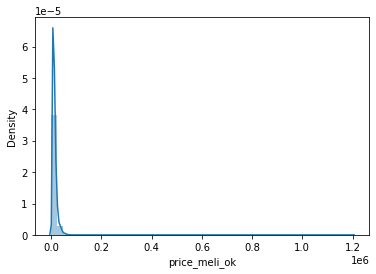

In [123]:
sns.distplot(df.price_meli_ok)

In [124]:
df.price_meli_ok.describe(percentiles=[0.1,0.25,0.5,0.75,0.9,0.99, 0.999])

count     26727.00
mean      13098.35
std       16401.68
min         480.77
10%        5528.85
25%        7211.54
50%       10500.00
75%       15625.00
90%       22518.16
99%       45900.00
99.9%     74927.40
max     1200000.00
Name: price_meli_ok, dtype: float64

In [125]:
###### Split #######

X = df[model_features + id_feature]
y = df.price_meli_ok

# 200 bines para discretizar la variable continua
bins = np.linspace(0, len(y), 20)
# Save your Y values in a new ndarray,
# broken down by the bins created above.
y_binned = np.digitize(y, bins)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20,  stratify=y_binned,random_state=42)
print(X_train.shape, X_test.shape)

(21381, 9) (5346, 9)


In [126]:
# chequeamos distribuciones del target en ambos dfs
a = pd.concat([y_train.describe(percentiles=[0.001,0.01,0.1,0.25,0.5,0.75,0.9,0.99])
              ,y_test.describe(percentiles=[0.001,0.01,0.1,0.25,0.5,0.75,0.9,0.99])],axis=1)
a.columns = ['price_train','price_test']
a

,price_train,price_test
count,21381.00,5346.00
mean,13091.58,13125.39
std,15691.35,18980.30
min,581.11,480.77
0.1%,2228.01,2246.39
1%,3605.77,3605.77
10%,5528.85,5528.85
25%,7211.54,7211.54
50%,10500.00,10500.00
75%,15625.00,15689.12


<AxesSubplot:xlabel='price_meli_ok', ylabel='Density'>

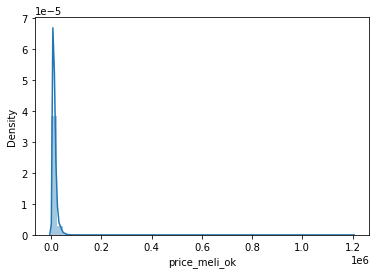

In [127]:
sns.distplot(y_train)

<AxesSubplot:xlabel='price_meli_ok', ylabel='Density'>

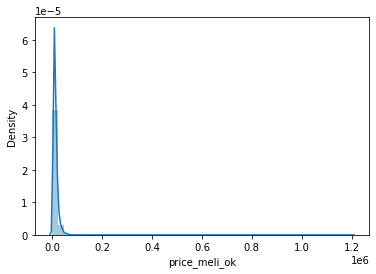

In [128]:
sns.distplot(y_test)

In [129]:
# chequeamos distribuciones de kms en ambos dfs
a = pd.concat([X_train.car_kms.describe(percentiles=[0.005,0.01,0.1,0.25,0.5,0.75,0.9,0.99])
              ,X_test.car_kms.describe(percentiles=[0.005, 0.01,0.1,0.25,0.5,0.75,0.9,0.99])],axis=1)
a.columns = ['kms_train','kms_test']
a

,kms_train,kms_test
count,21381.00,5346.00
mean,106597.41,105147.31
std,70848.05,68335.61
min,100.00,500.00
0.5%,1800.00,2316.68
1%,4820.80,5000.00
10%,30000.00,29850.00
25%,60000.00,59800.00
50%,99000.00,97000.00
75%,142000.00,140000.00


In [130]:
df_train = pd.concat([X_train,y_train],1)
df_test = pd.concat([X_test,y_test],1)

De ahora en más trabajamos solo sobre df_train para evitar data leakage.

In [131]:
del df

### Salvamos los df de train y test

In [132]:
df_train.to_csv('{}df_train_checkpoint_3.pkl'.format(path_datos))
df_test.to_csv('{}df_test_checkpoint_3.pkl'.format(path_datos))

# *Tratamiento de outliers nº1*

In [133]:
model_features = ['car_year','car_kms','match_marca_a','match_modelo_a','match_v1_a','match_v1_c', 'Subseg_a', 'Seg_a']
target = ['price_meli_ok']
id_features = ['runtime','car_id']

In [134]:
df_train.price_meli_ok.describe(percentiles=[0.005, 0.01,0.25,0.75,0.99,0.995,0.998,0.999])

count     21381.00
mean      13091.58
std       15691.35
min         581.11
0.5%       3221.15
1%         3605.77
25%        7211.54
50%       10500.00
75%       15625.00
99%       45673.08
99.5%     54326.92
99.8%     62254.62
99.9%     73860.00
max     1200000.00
Name: price_meli_ok, dtype: float64

In [135]:
df_train.shape

(21381, 10)

<AxesSubplot:xlabel='price_meli_ok'>

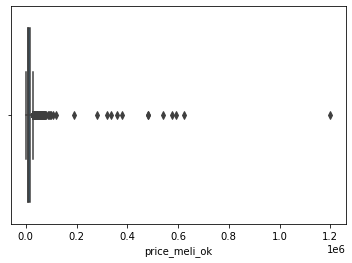

In [136]:
sns.boxplot(df_train.price_meli_ok)

In [137]:
# creamos diccionarios para guardar la info de capeo de outliers
thresh_outliers_1 = {}

In [138]:
# dropmeamos outliers globales de price
p_995 = df_train.price_meli_ok.quantile(0.995)
# guardamos la info de train para luego aplicarla en test
thresh_outliers_1['price_p995'] = p_995
mask = df_train.price_meli_ok <= p_995
df_train = df_train[mask]

<AxesSubplot:xlabel='price_meli_ok'>

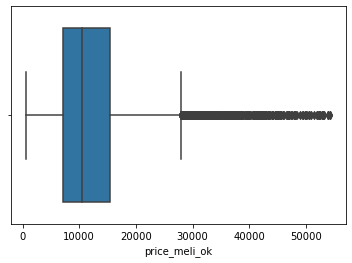

In [139]:
sns.boxplot(df_train.price_meli_ok)

In [140]:
df_train.price_meli_ok.describe(percentiles=[0.001,0.01,0.05,0.1,0.25,0.75,0.99])

count   21275.00
mean    12581.50
std      7833.06
min       581.11
0.1%     2214.39
1%       3605.77
5%       4567.31
10%      5528.85
25%      7211.54
50%     10411.62
75%     15496.37
99%     42000.00
max     54326.92
Name: price_meli_ok, dtype: float64

<AxesSubplot:xlabel='price_meli_ok', ylabel='Density'>

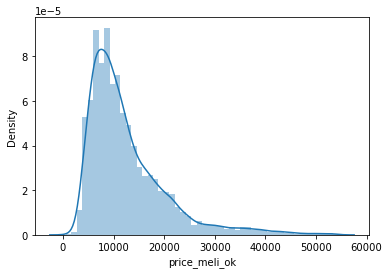

In [141]:
sns.distplot(df_train.price_meli_ok)

In [142]:
df_train.shape

(21275, 10)

**Ahora lo mismo pero para kms**

In [143]:
df_train.car_kms.describe(percentiles=[0.005, 0.01,0.25,0.75,0.99,0.995,0.998,0.999])

count     21275.00
mean     106929.30
std       70761.15
min         100.00
0.5%       2000.00
1%         5000.00
25%       60000.00
50%       99500.00
75%      142250.00
99%      300000.00
99.5%    346630.00
99.8%    424520.00
99.9%    541342.00
max     2000000.00
Name: car_kms, dtype: float64

<AxesSubplot:xlabel='car_kms'>

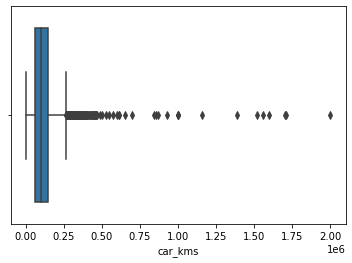

In [144]:
sns.boxplot(df_train.car_kms)

In [145]:
p_995 = df_train.car_kms.quantile(0.995)
# guardamos la info de train para luego aplicarla en test
thresh_outliers_1['kms_p995'] = p_995
mask = df_train.car_kms > p_995
len(df_train[mask])

107

In [146]:
# dropeamos outliers globales de car_kms
df_train = df_train[~mask]

In [147]:
# We are now able to save the dict with the information learned in the train set regarding the thresholds to cap outliers
import json
with open(f'{path_datos}thresh_outliers_1.json', 'w') as fp:
    json.dump(thresh_outliers_1, fp)

<AxesSubplot:xlabel='car_kms'>

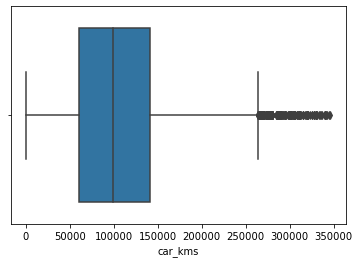

In [148]:
sns.boxplot(df_train.car_kms)

*Revision valores extremos o raros en car_year*

In [149]:
df_train.car_year.describe(percentiles=[0.005, 0.01,0.25,0.75,0.99,0.998,0.999])

count   21168.00
mean     2013.94
std         3.63
min      2006.00
0.5%     2006.00
1%       2006.00
25%      2011.00
50%      2014.00
75%      2017.00
99%      2021.00
99.8%    2021.00
99.9%    2021.00
max      2021.00
Name: car_year, dtype: float64

Vemos que no hay outliers ni casos raros en la variable de año

In [150]:
sorted(list(df_train.car_year.unique()))

[2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021]

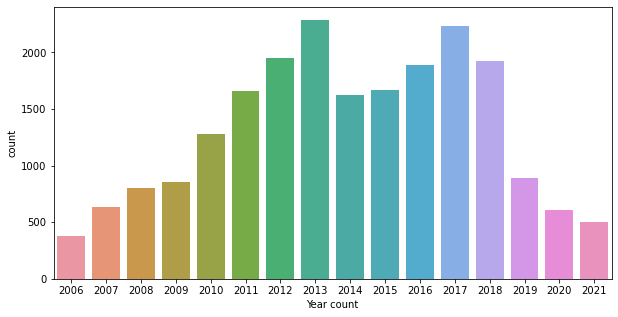

In [151]:
# plot distribution
fig = plt.figure(figsize = (10, 5))
sns.countplot(df_train.car_year)
plt.xlabel("Year count")
plt.show()

In [152]:
df_train['car_year'] = df_train['car_year'].astype('int')

***Fin del tratamiento de outliers nº1***

### *Tratamiento de outliers nº2*
* Es un tratamiento profundo donde buscamos **outliers por contexto** (outliers a nivel de agg marca-modelo-año)
* Notar que se hace despues del Split sobre el train, para evitar data leakage! Es decir: fit_transform sobre train y transform sobre test
* Luego lo aplicaremos sobre test pero con los thresholds de outliers aprendidos en train.

In [153]:
df_train['car_year'].dtype

dtype('int64')

In [154]:
# Dropeamos todos los outliers por contexo: "Tratamiento de outliers nº2"

modelos = sorted(list(df_train.match_modelo_a.unique()))
años = sorted(list(df_train.car_year.unique()))
kms_thresh_outliers = {}
price_thresh_outliers = {}
old_shape = df_train.shape[0]
for m in modelos:
    for a in años:
        # print(f'{m} of {a}') --> solo para chequear que el loop este iterando correctamente (esta OK :)
        
        modelo_año = m + '_' + str(a)
        
        
        # kms
        mask1 = df_train.match_modelo_a == m
        mask2 = df_train.car_year == a
        data = df_train[mask1 & mask2].copy()
        
        q1 = data.car_kms.quantile(0.25)
        q3 = data.car_kms.quantile(0.75)
        IQR = q3 - q1
        outl_thresh_superior = q3+3*IQR
        outl_thresh_inferior = q1-3*IQR
        kms_thresh_outliers[modelo_año] = (outl_thresh_inferior,outl_thresh_superior)
        filt_mask_sup = data.car_kms>kms_thresh_outliers[modelo_año][1]
        filt_mask_inf = data.car_kms<kms_thresh_outliers[modelo_año][0]
        data = data[~(filt_mask_sup | filt_mask_inf)]
        df_train = df_train.loc[~(mask1 & mask2),:]
        df_train = pd.concat([df_train,data],0)
        
        # price
        mask1 = df_train.match_modelo_a == m
        mask2 = df_train.car_year == a
        data = df_train[mask1 & mask2].copy()
        
        q1 = data.price_meli_ok.quantile(0.25)
        q3 = data.price_meli_ok.quantile(0.75)
        IQR = q3 - q1
        outl_thresh_superior = q3+3*IQR
        outl_thresh_inferior = q1-3*IQR
        price_thresh_outliers[modelo_año] = (outl_thresh_inferior,outl_thresh_superior)
        filt_mask_sup = data.price_meli_ok>price_thresh_outliers[modelo_año][1]
        filt_mask_inf = data.price_meli_ok<price_thresh_outliers[modelo_año][0]
        data = data[~(filt_mask_sup | filt_mask_inf)]
        df_train = df_train.loc[~(mask1 & mask2),:]
        df_train = pd.concat([df_train,data],0)

print(f'Hey! {old_shape - df_train.shape[0]} were removed from df_train due to outliers under context')        

Hey! 240 were removed from df_train due to outliers under context


In [155]:
import itertools
dict(itertools.islice(kms_thresh_outliers.items(), 15))

{'1500_2006': (nan, nan),
 '1500_2007': (nan, nan),
 '1500_2008': (nan, nan),
 '1500_2009': (nan, nan),
 '1500_2010': (nan, nan),
 '1500_2011': (nan, nan),
 '1500_2012': (nan, nan),
 '1500_2013': (nan, nan),
 '1500_2014': (-18605.0, 214390.0),
 '1500_2015': (-2000.0, 194000.0),
 '1500_2016': (-9715.0, 140470.0),
 '1500_2017': (-13500.0, 184250.0),
 '1500_2018': (-31500.0, 147875.0),
 '1500_2019': (-59500.0, 140000.0),
 '1500_2020': (-27500.0, 77500.0)}

In [156]:
dict(itertools.islice(price_thresh_outliers.items(),15))

{'1500_2006': (nan, nan),
 '1500_2007': (nan, nan),
 '1500_2008': (nan, nan),
 '1500_2009': (nan, nan),
 '1500_2010': (nan, nan),
 '1500_2011': (nan, nan),
 '1500_2012': (nan, nan),
 '1500_2013': (nan, nan),
 '1500_2014': (21495.19230769232, 47173.07692307691),
 '1500_2015': (24461.53846153847, 48153.84615384615),
 '1500_2016': (31875.0, 48500.0),
 '1500_2017': (34384.615384615376, 47711.53846153847),
 '1500_2018': (30829.3269230769, 61134.615384615405),
 '1500_2019': (40865.38461538461, 57692.3076923077),
 '1500_2020': (41855.76923076925, 61139.42307692306)}

In [157]:
# Guardamos los diccionarios con la info de outiers thresholds en formato json
with open('{}kms_thresh_outliers.json'.format(path_datos), 'w') as outfile:
    json.dump(kms_thresh_outliers, outfile)

with open('{}price_thresh_outliers.json'.format(path_datos), 'w') as outfile:
    json.dump(price_thresh_outliers, outfile)

Notesé que en muchos casos nos quedan "nan", eso es porque aveces no tenemos ningun registro de un marca-modelo para un cierto año en particular (ej: talvez no se fabrico ese modelo durante ese año o cosas así). Por lo único que tendremos que tener cuidado es cuando apliquemos este cleaning sobre test, vamos a tener que poner un "if" que haga un "continue" en caso de que los thresh sean "nan"

In [158]:
df_train.to_csv('{}df_train_checkpoint_4.pkl'.format(path_datos)) # este es el df_train final!
# el test sigue igual

# Applying data cleaning in the test set

In [159]:
df_train_ok = pd.read_csv('{}df_train_checkpoint_4.pkl'.format(path_datos))

In [160]:
df_test = pd.read_csv('{}df_test_checkpoint_3.pkl'.format(path_datos))

In [161]:
print(df_train_ok.shape)
print(df_test.shape)

(20928, 11)
(5346, 11)


In [162]:
# Aplicamos el data cleaning aprendido en train sobre el set de test para usarlo en la evaluacion
df_test_ok = cleaning_after_split(df_test,path_datos)

Hey! 62 were removed due to outliers globales
Hey! 187 were removed from df due to outliers under context


In [163]:
df_test_ok.shape

(5097, 11)

In [164]:
# checkpoint download
df_test_ok.to_csv('{}df_test_checkpoint_4.pkl'.format(path_datos)) # este es el df_test final!

In [165]:
# checkpoint upload
#df_test_ok = pd.read_csv('{}df_test_checkpoint_4.pkl'.format(path_save))
#df_test_ok.shape

### Save the IDs that we've used in train
This is for the validation oot with ids that werent used in train-test

In [166]:
# We can see that they are completely different
## No se repiten IDs (es decir que no hay ningun ID en train que tambien este en test y viceversa)
display(len(list(set(df_train_ok.car_id.unique()).difference(set(df_test_ok.car_id.unique()))))
        ,len(list(set(df_test_ok.car_id.unique()).difference(set(df_train_ok.car_id.unique()))))
       )

20928

5097

In [167]:
ids_dev = list(df_train_ok.car_id.unique()) + list(df_test_ok.car_id.unique())
len(ids_dev)

26025

In [168]:
df_ids_dev = pd.DataFrame(ids_dev, columns=['car_id_dev'])
df_ids_dev.to_csv('{}df_ids_dev.pkl'.format(path_datos))

# Modelling

In [169]:
model_features = ['car_year','car_kms','match_marca_a','match_modelo_a','match_v1_a','Subseg_a', 'Seg_a']

In [170]:
# Volvemos a separar en X e y
X_train = df_train_ok[model_features]
y_train = df_train_ok.price_meli_ok

X_test = df_test_ok[model_features]
y_test = df_test_ok.price_meli_ok

## Modelo Baseline

In [171]:
X_train.columns

Index(['car_year', 'car_kms', 'match_marca_a', 'match_modelo_a', 'match_v1_a',
       'Subseg_a', 'Seg_a'],
      dtype='object')

In [172]:
# Recordar agregar esto en la funcion de procesamiento para la simulacion

# Cuando hice el tratamiento de 1111 y 99999 había pasado la feature de kms a int. Volvemos a pasar a float por el catboost
X_train['car_kms'] = X_train['car_kms'].astype('float')
X_test['car_kms'] = X_test['car_kms'].astype('float')

# probamos tanto usando year como int y como float y la perfo del modelo dio apenas mejor con year en float
X_train['car_year'] = X_train['car_year'].astype('float')
X_test['car_year'] = X_test['car_year'].astype('float')

In [173]:
X_train.dtypes

car_year          float64
car_kms           float64
match_marca_a      object
match_modelo_a     object
match_v1_a         object
Subseg_a           object
Seg_a              object
dtype: object

In [174]:
np.where(X_train[model_features].dtypes != np.float)[0]

array([2, 3, 4, 5, 6])

In [175]:
# ventana 60
#model=CatBoostRegressor(loss_function='RMSE',logging_level="Silent")
#categorical_features_indices = np.where(X_train[model_features].dtypes != np.float)[0]
#model.fit(X_train, y_train, cat_features=categorical_features_indices)#, eval_set=(X_test, y_test))
#
#train_pred = model.predict(X_train)
#test_pred = model.predict(X_test)
#
#print('Train set evaluation:\n_____________________________________')
#print_evaluate(y_train, train_pred)
#print('Test set evaluation:\n_____________________________________')
#print_evaluate(y_test, test_pred)

MAPE Test: 8.8

In [176]:
# ventana 90
#model=CatBoostRegressor(loss_function='RMSE',logging_level="Silent")
#categorical_features_indices = np.where(X_train[model_features].dtypes != np.float)[0]
#model.fit(X_train, y_train, cat_features=categorical_features_indices)#, eval_set=(X_test, y_test))
#
#train_pred = model.predict(X_train)
#test_pred = model.predict(X_test)
#
#print('Train set evaluation:\n_____________________________________')
#print_evaluate(y_train, train_pred)
#print('Test set evaluation:\n_____________________________________')
#print_evaluate(y_test, test_pred)

MAPE Test: 9

In [179]:
# ventana 10
model=CatBoostRegressor(loss_function='RMSE',logging_level="Silent")
categorical_features_indices = np.where(X_train[model_features].dtypes != np.float)[0]
model.fit(X_train, y_train, cat_features=categorical_features_indices)#, eval_set=(X_test, y_test))

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

Train set evaluation:
_____________________________________
MAE: 921.0450458419743
MAPE: 8.253311256604084
MEDAPE: 6.05868033002432
MSE: 1892341.9599158696
RMSE: 1375.6242073749174
R2 Square 0.9675026339483129
__________________________________
Test set evaluation:
_____________________________________
MAE: 933.4337678666798
MAPE: 8.257241079302444
MEDAPE: 6.295213950756219
MSE: 1884416.7527586098
RMSE: 1372.7405992242707
R2 Square 0.965883221731492
__________________________________


In [177]:
# ventana 5
model=CatBoostRegressor(loss_function='RMSE',logging_level="Silent")
categorical_features_indices = np.where(X_train[model_features].dtypes != np.float)[0]
model.fit(X_train, y_train, cat_features=categorical_features_indices)#, eval_set=(X_test, y_test))

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

Train set evaluation:
_____________________________________
MAE: 938.114098174449
MAPE: 8.233160013927375
MEDAPE: 6.118406790772348
MSE: 1980460.9871504686
RMSE: 1407.288523065
R2 Square 0.9672744587744715
__________________________________
Test set evaluation:
_____________________________________
MAE: 978.7294972774024
MAPE: 8.689038388393492
MEDAPE: 6.437841464631025
MSE: 2190625.158737158
RMSE: 1480.0760651862315
R2 Square 0.9621914210172988
__________________________________


Nos quedamos con la ventana de 10 dias

In [ ]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,car_year,29.45
1,Subseg_a,18.72
2,match_marca_a,16.06
3,match_modelo_a,11.43
4,Seg_a,9.45
5,match_v1_a,7.46
6,car_kms,7.44


In [500]:
# Save del modelo fiteado

path_model_save = '../model/'

import pickle
with open('{}model_dolar_v4.pickle'.format(path_model_save), 'wb') as f:
    pickle.dump(model, f)

#### Model assesment (on test set)

In [501]:
test_pred = pd.Series(test_pred,name='test_pred')
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
d = pd.concat([X_test, y_test, test_pred],1)

In [502]:
d.head()

,car_year,car_kms,match_marca_a,match_modelo_a,match_v1_a,Subseg_a,Seg_a,price_meli_ok,test_pred
0,2016.00,74000.00,HYUNDAI,H1,Minibus 12 Pas. 2.5 CRDI AT Full Premium VGT (...,SUV 4X2,SUV,30000.00,28893.02
1,2015.00,74000.00,TOYOTA,86,FT 6MT (200cv),Gama Medianos Premium,Gama Medianos,25000.00,24063.45
2,2017.00,42000.00,CHEVROLET,Classic,4Ptas. 1.4 N LS Pack,Gama Pequenos Hatchback,Gama Pequenos,7389.16,9390.93
3,2020.00,1000.00,HONDA,Fit,1.5 EX CVT IVTEC (120cv) (L18),Monovolumen Compacto,Monovolumen,25000.00,20456.11
4,2008.00,240000.00,VOLKSWAGEN,The Beetle,2.0 TSI Sport DSG (L17),Gama Medianos Hatchback,Gama Medianos,6666.67,9182.34


In [503]:
y_test = d['price_meli_ok']
deciles_y_true = y_test.quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

dic = {}
for i in range(1,10+1):
    dic['d{}'.format(i)] = deciles_y_true.values[i-1]

In [504]:
dic

{'d1': 4888.997555012225,
 'd2': 6295.399515738499,
 'd3': 7500.0,
 'd4': 8737.864077669903,
 'd5': 9985.393462469734,
 'd6': 11623.984303247893,
 'd7': 13725.490196078432,
 'd8': 16949.15254237288,
 'd9': 22277.22772277228,
 'd10': 53000.0}

In [505]:
# We discretize the vector of true labels to see it in deciles
d['y_true_disc'] = np.where(y_test <= dic['d1'], 'd01',
                       np.where((y_test > dic['d1']) & (y_test <= dic['d2']), 'd02',
                               np.where((y_test > dic['d2']) & (y_test <= dic['d3']), 'd03',
                                       np.where((y_test > dic['d3']) & (y_test <= dic['d4']), 'd04',
                                               np.where((y_test > dic['d4']) & (y_test <= dic['d5']), 'd05',
                                                       np.where((y_test > dic['d5']) & (y_test <= dic['d6']), 'd06',
                                                               np.where((y_test > dic['d6']) & (y_test <= dic['d7']), 'd07',
                                                                       np.where((y_test > dic['d7']) & (y_test <= dic['d8']), 'd08',
                                                                               np.where((y_test > dic['d8']) & (y_test <= dic['d9']), 'd09',
                                                                                       np.where((y_test > dic['d9']) & (y_test <= dic['d10']), 'd10','out_of_bounds'))))))))))

In [506]:
d.head(10)

,car_year,car_kms,match_marca_a,match_modelo_a,match_v1_a,Subseg_a,Seg_a,price_meli_ok,test_pred,y_true_disc
0,2016.00,74000.00,HYUNDAI,H1,Minibus 12 Pas. 2.5 CRDI AT Full Premium VGT (...,SUV 4X2,SUV,30000.00,28893.02,d10
1,2015.00,74000.00,TOYOTA,86,FT 6MT (200cv),Gama Medianos Premium,Gama Medianos,25000.00,24063.45,d10
2,2017.00,42000.00,CHEVROLET,Classic,4Ptas. 1.4 N LS Pack,Gama Pequenos Hatchback,Gama Pequenos,7389.16,9390.93,d03
3,2020.00,1000.00,HONDA,Fit,1.5 EX CVT IVTEC (120cv) (L18),Monovolumen Compacto,Monovolumen,25000.00,20456.11,d10
4,2008.00,240000.00,VOLKSWAGEN,The Beetle,2.0 TSI Sport DSG (L17),Gama Medianos Hatchback,Gama Medianos,6666.67,9182.34,d03
5,2010.00,147000.00,HONDA,Accord,2.4 EXL AT (182cv) (L 03),Gama Grandes Sedan,Gama Grandes,10891.09,11179.06,d06
6,2013.00,130000.00,PEUGEOT,2008,1.6 16v. Feline Tiptronic (115cv) (L20),Suv Compactas 4x2,SUV,6403.94,9474.29,d03
7,2018.00,44000.00,HONDA,CRV,2.4 EX AT,SUV 4X4,SUV,50000.00,31640.55,d10
8,2015.00,36000.00,TOYOTA,86,FT 6MT (200cv),Gama Medianos Premium,Gama Medianos,41900.00,26399.20,d10
9,2006.00,200000.00,CHRYSLER,PT Cruiser,2.0 Classic MT,Gama Medianos Hatchback,Gama Medianos,4081.63,4965.36,d01


In [507]:
# Accuracy
d['menos20perc'] = d.test_pred * 0.9
d['mas20perc'] = d.test_pred * 1.1
d['menos20perc'] = d['menos20perc'].astype('int')
d['mas20perc'] = d['mas20perc'].astype('int')
d['falls_in_range'] = np.where(
    (d['price_meli_ok']>=d['menos20perc']) & (d['price_meli_ok']<=d['mas20perc']),1,0)

In [508]:
d.head()

,car_year,car_kms,match_marca_a,match_modelo_a,match_v1_a,Subseg_a,Seg_a,price_meli_ok,test_pred,y_true_disc,menos20perc,mas20perc,falls_in_range
0,2016.00,74000.00,HYUNDAI,H1,Minibus 12 Pas. 2.5 CRDI AT Full Premium VGT (...,SUV 4X2,SUV,30000.00,28893.02,d10,26003,31782,1
1,2015.00,74000.00,TOYOTA,86,FT 6MT (200cv),Gama Medianos Premium,Gama Medianos,25000.00,24063.45,d10,21657,26469,1
2,2017.00,42000.00,CHEVROLET,Classic,4Ptas. 1.4 N LS Pack,Gama Pequenos Hatchback,Gama Pequenos,7389.16,9390.93,d03,8451,10330,0
3,2020.00,1000.00,HONDA,Fit,1.5 EX CVT IVTEC (120cv) (L18),Monovolumen Compacto,Monovolumen,25000.00,20456.11,d10,18410,22501,0
4,2008.00,240000.00,VOLKSWAGEN,The Beetle,2.0 TSI Sport DSG (L17),Gama Medianos Hatchback,Gama Medianos,6666.67,9182.34,d03,8264,10100,0


In [509]:
# Overall Accuracy
d.falls_in_range.mean()

0.6560464819307879

In [510]:
# Accuracy by decile
acc_by_dec = d.groupby('y_true_disc')['falls_in_range'].mean().reset_index()
acc_by_dec

,y_true_disc,falls_in_range
0,d01,0.46
1,d02,0.56
2,d03,0.63
3,d04,0.66
4,d05,0.70
5,d06,0.71
6,d07,0.71
7,d08,0.72
8,d09,0.72
9,d10,0.69


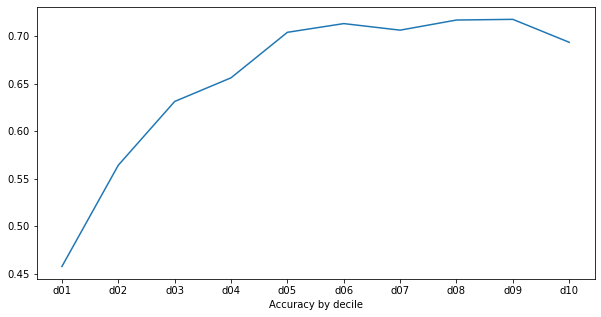

In [511]:
# plot distribution
fig = plt.figure(figsize = (10, 5))
plt.plot(acc_by_dec['y_true_disc'], acc_by_dec['falls_in_range'])
plt.xlabel("Accuracy by decile")
plt.show()

## Validacion OOT

actualizar los datasets para que sean OOT contra la muestra actual de train que agarra hasta el 25 de mayo

In [512]:
# Importar tabla de Big Query
#query = '''SELECT *
#           FROM `data-team-k.pricing_data.match_meli_ok`
#           WHERE date between "2022-04-22" and "2022-04-26"
#            '''
#df_scoreo_oot = gbq.read_gbq(query, project_id="data-team-k")

In [513]:
# checkpoint download
#df_scoreo_oot.to_csv('{}df_score_oot_mayor_2204.csv'.format(path_save))

In [514]:
# checkpoint upload
df_scoreo_oot = pd.read_csv('{}df_score_oot_mayor_2204.csv'.format(path_datos))

In [38]:
df_scoreo_oot.shape

(557511, 43)

In [39]:
# chequeo
print(len(df_scoreo_oot))
print(df_scoreo_oot.date.min(), df_scoreo_oot.date.max())

557511
2022-04-22 2022-04-26


In [40]:
# Creamos la feature marca_modelo_version ya que necesitamos tenerla en el df para las funciones de limpieza
df_scoreo_oot['marca_modelo_version'] = df_scoreo_oot['match_marca_a'] + str(' - ') +df_scoreo_oot['match_modelo_a'] + str(' - ') + df_scoreo_oot['match_v1_a']

In [41]:
# aplicamos la limpieza pre split
df_scoreo_oot = cleaning_before_split(df_scoreo_oot,ventana=15)

Hey! 242 were removed due to null values
Hey! 443424 were removed due to duplicate values
Hey! 863 were removed due those 11111 or 9999 strange values
Hey! 63313 were removed due to 0km or concesioarias
Hey! 10703 were removed due to match scores under 80%
Hey! 0 were removed due to last 15d filter
Hey! 6463 were removed due to categories in which we are not interested in score


In [42]:
df_scoreo_oot.shape

(32503, 48)

In [45]:
# aplicamos la limpieza post split
df_scoreo_oot = cleaning_after_split(df_scoreo_oot,path_datos)

Hey! 337 were removed due to outliers globales
Hey! 723 were removed from df due to outliers under context


In [48]:
df_scoreo_oot.shape

(31443, 48)

In [49]:
model_features = ['car_year','car_kms','match_marca_a','match_modelo_a','match_v1_a','Subseg_a', 'Seg_a']

In [50]:
import pickle
path_model = '../model/'
with open('{}model_dolar_v4.pickle'.format(path_model), 'rb') as f:
    model = pickle.load(f)

In [51]:
X_oot = df_scoreo_oot[model_features].copy()
y_oot = df_scoreo_oot.price_meli_ok.copy()

In [52]:
# Assesment
oot_pred = model.predict(X_oot)

print('OOT set evaluation:\n_____________________________________')
print_evaluate(y_oot, oot_pred)

OOT set evaluation:
_____________________________________
MAE: 1186.0599043281586
MAPE: 10.603378696773367
MEDAPE: 8.311162881151073
MSE: 2838097.369760595
RMSE: 1684.6653583903822
R2 Square 0.9569591157843419
__________________________________


### Model assesment (on validation/oot set)

In [53]:
oot_pred = pd.Series(oot_pred,name='oot_pred')
d = pd.concat([X_oot.reset_index(drop=True), y_oot.reset_index(drop=True), oot_pred],1)

In [54]:
d.head()

,car_year,car_kms,match_marca_a,match_modelo_a,match_v1_a,Subseg_a,Seg_a,price_meli_ok,oot_pred
0,2015.00,74000,CHEVROLET,Montana,1.8 8v. LS AA DA (105cv) DISCONTINUO,Baja PU - Furgones,Livianos,8867.00,9071.45
1,2020.00,1000,HONDA,Fit,1.5 EX CVT IVTEC (120cv) (L18),Monovolumen Compacto,Monovolumen,25000.00,25048.10
2,2015.00,41000,CHEVROLET,Cobalt,1.8 8v. LT MT (105cv),Gama Pequenos Sedan,Gama Pequenos,8128.08,9457.16
3,2018.00,94000,CHEVROLET,Montana,1.8 8v. LS AA DA (105cv) DISCONTINUO,Baja PU - Furgones,Livianos,9882.35,10721.50
4,2018.00,15561,FIAT,Uno,Fire 1.3 Pack C / Way (68cv) 5Ptas.,Gama Pequenos Hatchback,Gama Pequenos,9882.35,12139.74


In [55]:
y_val = d['price_meli_ok']
deciles_y_true = y_val.quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

dic = {}
for i in range(1,10+1):
    dic['d{}'.format(i)] = deciles_y_true.values[i-1]

In [56]:
dic

{'d1': 5176.470588235294,
 'd2': 6365.152941176472,
 'd3': 7635.467980295566,
 'd4': 8941.176470588236,
 'd5': 10352.941176470587,
 'd6': 11764.70588235294,
 'd7': 14070.588235294117,
 'd8': 17176.470588235294,
 'd9': 23000.0,
 'd10': 53176.470588235294}

In [57]:
# We discretize the vector of true labels to see it in deciles
d['y_true_disc'] = np.where(y_val <= dic['d1'], 'd01',
                       np.where((y_val > dic['d1']) & (y_val <= dic['d2']), 'd02',
                               np.where((y_val > dic['d2']) & (y_val <= dic['d3']), 'd03',
                                       np.where((y_val > dic['d3']) & (y_val <= dic['d4']), 'd04',
                                               np.where((y_val > dic['d4']) & (y_val <= dic['d5']), 'd05',
                                                       np.where((y_val > dic['d5']) & (y_val <= dic['d6']), 'd06',
                                                               np.where((y_val > dic['d6']) & (y_val <= dic['d7']), 'd07',
                                                                       np.where((y_val > dic['d7']) & (y_val <= dic['d8']), 'd08',
                                                                               np.where((y_val > dic['d8']) & (y_val <= dic['d9']), 'd09',
                                                                                       np.where((y_val > dic['d9']) & (y_val <= dic['d10']), 'd10','out_of_bounds'))))))))))

In [58]:
d.head(10)

,car_year,car_kms,match_marca_a,match_modelo_a,match_v1_a,Subseg_a,Seg_a,price_meli_ok,oot_pred,y_true_disc
0,2015.00,74000,CHEVROLET,Montana,1.8 8v. LS AA DA (105cv) DISCONTINUO,Baja PU - Furgones,Livianos,8867.00,9071.45,d04
1,2020.00,1000,HONDA,Fit,1.5 EX CVT IVTEC (120cv) (L18),Monovolumen Compacto,Monovolumen,25000.00,25048.10,d10
2,2015.00,41000,CHEVROLET,Cobalt,1.8 8v. LT MT (105cv),Gama Pequenos Sedan,Gama Pequenos,8128.08,9457.16,d04
3,2018.00,94000,CHEVROLET,Montana,1.8 8v. LS AA DA (105cv) DISCONTINUO,Baja PU - Furgones,Livianos,9882.35,10721.50,d05
4,2018.00,15561,FIAT,Uno,Fire 1.3 Pack C / Way (68cv) 5Ptas.,Gama Pequenos Hatchback,Gama Pequenos,9882.35,12139.74,d05
5,2021.00,4900,CITROEN,C4 Lounge,1.6 THP 6MT Feel Pack (165cv) (L16),Gama Medianos Sedan,Gama Medianos,18305.88,23075.12,d09
6,2021.00,18500,CITROEN,C4 Lounge,1.6 HDI 6MT Feel Pack (115cv) (L16),Gama Medianos Sedan,Gama Medianos,16894.12,21555.08,d08
7,2021.00,7200,CITROEN,C4 Lounge,1.6 THP 6AT Shine (165cv) (L16),Gama Medianos Sedan,Gama Medianos,18588.24,23321.37,d09
8,2020.00,204000,RENAULT,Sandero Stepway,Fase II 1.6 16v Expression / Confort ABCP ABS ...,Gama Pequenos Hatchback,Gama Pequenos,5647.06,12186.81,d02
9,2019.00,6900,CITROEN,C4,5Ptas.- 1.6 Hdi SX,Gama Medianos Sedan,Gama Medianos,18588.24,15887.18,d09


In [59]:
# Accuracy
d['menos10perc'] = d.oot_pred * 0.9
d['mas10perc'] = d.oot_pred * 1.1
d['menos10perc'] = d['menos10perc'].astype('int')
d['mas10perc'] = d['mas10perc'].astype('int')
d['falls_in_range'] = np.where(
    (d['price_meli_ok']>=d['menos10perc']) & (d['price_meli_ok']<=d['mas10perc']),1,0)

In [60]:
d.head()

,car_year,car_kms,match_marca_a,match_modelo_a,match_v1_a,Subseg_a,Seg_a,price_meli_ok,oot_pred,y_true_disc,menos10perc,mas10perc,falls_in_range
0,2015.00,74000,CHEVROLET,Montana,1.8 8v. LS AA DA (105cv) DISCONTINUO,Baja PU - Furgones,Livianos,8867.00,9071.45,d04,8164,9978,1
1,2020.00,1000,HONDA,Fit,1.5 EX CVT IVTEC (120cv) (L18),Monovolumen Compacto,Monovolumen,25000.00,25048.10,d10,22543,27552,1
2,2015.00,41000,CHEVROLET,Cobalt,1.8 8v. LT MT (105cv),Gama Pequenos Sedan,Gama Pequenos,8128.08,9457.16,d04,8511,10402,0
3,2018.00,94000,CHEVROLET,Montana,1.8 8v. LS AA DA (105cv) DISCONTINUO,Baja PU - Furgones,Livianos,9882.35,10721.50,d05,9649,11793,1
4,2018.00,15561,FIAT,Uno,Fire 1.3 Pack C / Way (68cv) 5Ptas.,Gama Pequenos Hatchback,Gama Pequenos,9882.35,12139.74,d05,10925,13353,0


In [61]:
# Overall Accuracy
d.falls_in_range.mean()

0.6127914003116751

In [62]:
# Accuracy by decile
acc_by_dec = d.groupby('y_true_disc')['falls_in_range'].mean().reset_index()
acc_by_dec

,y_true_disc,falls_in_range
0,d01,0.39
1,d02,0.57
2,d03,0.63
3,d04,0.57
4,d05,0.62
5,d06,0.68
6,d07,0.68
7,d08,0.66
8,d09,0.66
9,d10,0.71


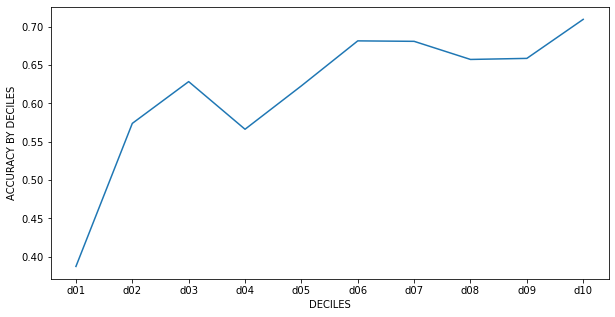

In [63]:
# plot distribution
fig = plt.figure(figsize = (10, 5))
plt.plot(acc_by_dec['y_true_disc'], acc_by_dec['falls_in_range'])
plt.xlabel("DECILES")
plt.ylabel("ACCURACY BY DECILES")
plt.show()

### Validacion OOT (IDs nuevos!)
fecha de la corrida: 4 de mayo

In [64]:
# Importar tabla de Big Query
#query = '''SELECT *
#           FROM `data-team-k.pricing_data.match_meli_ok`
#           WHERE date > "2022-04-26"
#            '''
#df_scoreo_oot = gbq.read_gbq(query, project_id="data-team-k")

In [65]:
#df_scoreo_oot.shape

In [66]:
# checkpoint upload
#df_scoreo_oot.to_csv('{}df_score_oot_IDsnuevos_mayor_2604.csv'.format(path_save))

In [68]:
# checkpoint upload
df_scoreo_oot = pd.read_csv('{}df_score_oot_IDsnuevos_mayor_2604.csv'.format(path_datos))

In [69]:
df_scoreo_oot.shape

(861914, 43)

In [70]:
# chequeo
print(len(df_scoreo_oot))
print(df_scoreo_oot.date.min(), df_scoreo_oot.date.max())

861914
2022-04-26 2022-05-03


In [71]:
# Creamos la feature marca_modelo_version ya que necesitamos tenerla en el df para las funciones de limpieza
df_scoreo_oot['marca_modelo_version'] = df_scoreo_oot['match_marca_a'] + str(' - ') +df_scoreo_oot['match_modelo_a'] + str(' - ') + df_scoreo_oot['match_v1_a']

In [73]:
# aplicamos la limpieza pre split
df_scoreo_oot = cleaning_before_split(df_scoreo_oot,ventana=15)

Hey! 38 were removed due to null values
Hey! 741463 were removed due to duplicate values
Hey! 913 were removed due those 11111 or 9999 strange values
Hey! 66555 were removed due to 0km or concesioarias
Hey! 17550 were removed due to match scores under 80%
Hey! 0 were removed due to last 15d filter
Hey! 7414 were removed due to categories in which we are not interested in score


In [74]:
df_scoreo_oot.shape

(27981, 48)

In [76]:
# aplicamos la limpieza post split
df_scoreo_oot = cleaning_after_split(df_scoreo_oot,path_datos)

Hey! 287 were removed due to outliers globales
Hey! 633 were removed from df due to outliers under context


In [77]:
df_scoreo_oot.shape

(27061, 48)

In [78]:
# Eliminamos los car_id que ya hayamos usado para entrenar
ids_dev = list(df_ids_dev.car_id_dev.unique())
mask = df_scoreo_oot.car_id.apply(lambda x: x not in ids_dev)
df_scoreo_oot[mask].shape

(8751, 48)

In [79]:
model_features = ['car_year','car_kms','match_marca_a','match_modelo_a','match_v1_a','Subseg_a', 'Seg_a']

In [80]:
import pickle
path_model = '../model/'
with open('{}model_dolar_v4.pickle'.format(path_model), 'rb') as f:
    model = pickle.load(f)

In [81]:
X_oot = df_scoreo_oot[model_features].copy()
y_oot = df_scoreo_oot.price_meli_ok.copy()

In [82]:
# Assesment
oot_pred = model.predict(X_oot)

print('OOT set evaluation:\n_____________________________________')
print_evaluate(y_oot, oot_pred)

OOT set evaluation:
_____________________________________
MAE: 1005.9435308043462
MAPE: 8.919921458188638
MEDAPE: 6.694725392375961
MSE: 2211469.235945819
RMSE: 1487.100950152954
R2 Square 0.9640020751112323
__________________________________


**Next steps**: con todo lo anterior terminado ya queda lista esta notebook. El proximo paso seria duplicar esta nb y correr todo lo mismo pero expandiendo la ventana de tiempo con el fin de expandir la muestra (es decir no quedarnos con los ult 15 dias sino con los ultimos 2 meses por ejemplo todo la inflacion ya no nos afecta), y esto va a generar que el armado de los grupos de presencialidad cambie ya que vamos a tener bastante mas muestra.

Por otro lado, probar de correr esta nb exacamente igual (duplicandola) y modificar en la parte de los grupos lo siguiente: incluir grupos 1,2 y3 en lugar de solamente incluir el 1 como quedo en esta.